# CPU and Memory Usage Analysis Server Side

In [26]:
import pandas as pd
import os
import matplotlib.pyplot as plt

# Specify the directory containing the CSV files
file_path = '../data/tests/resource_usage_server_1747097699683.csv'

#data\tests\resource_usage_server_1747097699683.csv

# Now, you can work with the list of DataFrames
# For example, to concatenate all DataFrames into one:
df = pd.read_csv(file_path)
df['capture_number'] = range(1, len(df) + 1)

In [27]:
df.head()

,image_size,processing_time,cpu_usage,memory_usage,image_path,preprocess_time,inference_time,postprocess_time,original_shape,objects_detected,capture_number
0,165990,2.853658,0.007286,0.129000,./data/server/photo_1747097700904_result..tiff,1.7552,825.4215,1.0260,"[480, 640]","[['car', 0.6867769956588745]]",1
1,167718,2.343359,0.010783,0.129000,./data/server/photo_1747097706858_result..tiff,1.5508,816.7835,1.2087,"[480, 640]","[['car', 0.6099881529808044], ['car', 0.570401...",2
2,171790,2.546985,0.005160,0.129000,./data/server/photo_1747097712258_result..tiff,1.9342,879.7130,1.2144,"[480, 640]","[['car', 0.5413845181465149], ['car', 0.526414...",3
3,269904,2.444573,0.014042,0.129000,./data/server/photo_1747097717871_result..tiff,2.0074,825.3659,1.1191,"[480, 640]","[['car', 0.8237241506576538], ['car', 0.479592...",4
4,261030,2.954313,0.010345,0.128966,./data/server/photo_1747097723386_result..tiff,1.4734,818.9498,1.2378,"[480, 640]","[['car', 0.8459566831588745], ['car', 0.578968...",5


## 1. Line Plot: CPU and Memory Usage Over Processing Time

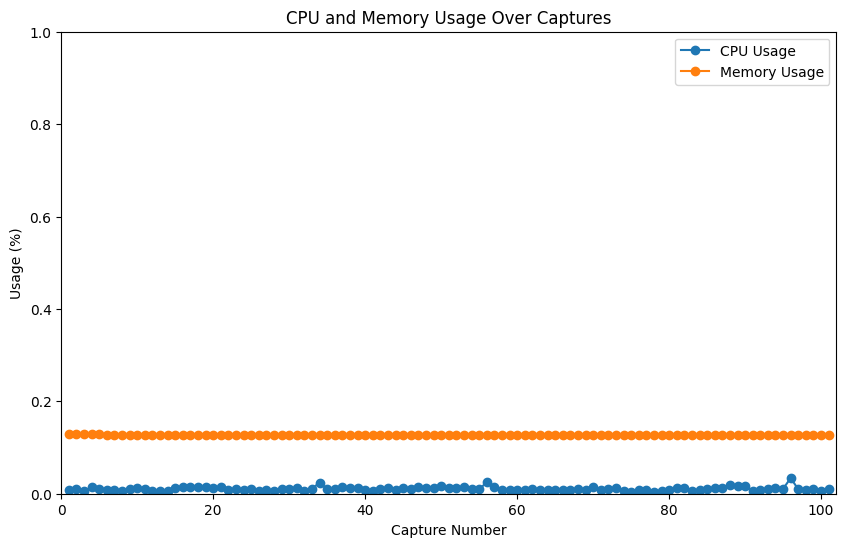

In [28]:
plt.figure(figsize=(10, 6))
plt.plot(df['capture_number'], df['cpu_usage'], label='CPU Usage', marker='o')
plt.plot(df['capture_number'], df['memory_usage'], label='Memory Usage', marker='o')
plt.xlabel('Capture Number')
plt.ylabel('Usage (%)')
plt.title('CPU and Memory Usage Over Captures')
plt.xlim(0, df['capture_number'].max() + 1)  # Add some padding on x-axis
plt.ylim(0, 1)  # Assuming usage percentage is between 0 and 100
plt.legend()
plt.show()

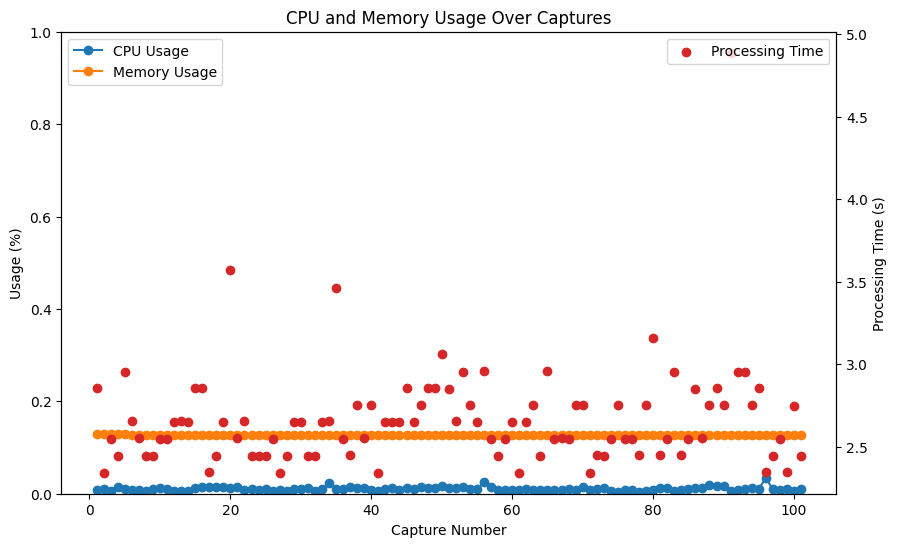

In [29]:
fig, ax1 = plt.subplots(figsize=(10, 6))

ax1.plot(df['capture_number'], df['cpu_usage'], label='CPU Usage', marker='o', color='tab:blue')
ax1.plot(df['capture_number'], df['memory_usage'], label='Memory Usage', marker='o', color='tab:orange')
ax1.set_xlabel('Capture Number')
ax1.set_ylabel('Usage (%)')
ax1.set_title('CPU and Memory Usage Over Captures')
ax1.legend(loc='upper left')
# Set the y-axis limit for CPU usage
ax1.set_ylim(0, 1)


ax2 = ax1.twinx()
ax2.scatter(df['capture_number'], df['processing_time'], color='tab:red', label='Processing Time')
ax2.set_ylabel('Processing Time (s)')
ax2.legend(loc='upper right')

plt.show()

TypeError: _AxesBase.set_ylim() takes from 1 to 3 positional arguments but 5 were given

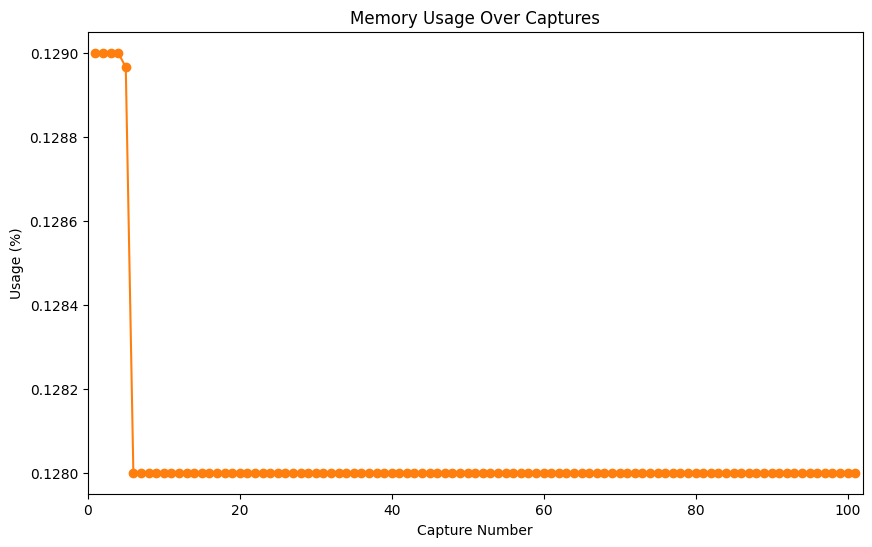

In [30]:
plt.figure(figsize=(10, 6))
plt.plot(df['capture_number'], df['memory_usage'], label='Memory Usage', marker='o', color='tab:orange')
plt.xlabel('Capture Number')
plt.ylabel('Usage (%)')
plt.title('Memory Usage Over Captures')
plt.xlim(0, df['capture_number'].max() + 1)  # Add some padding on x-axis
plt.ylim(df['memory_usage'].min()-0,1, df['memory_usage'].max()-0,1)  # Assuming usage percentage is between 0 and 100
plt.show()

# image_size

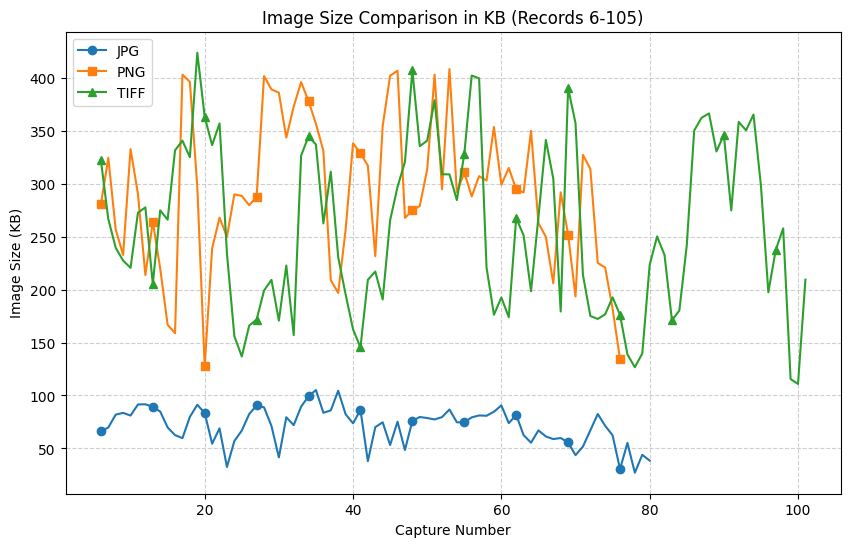

In [31]:
import pandas as pd
import matplotlib.pyplot as plt

# Cargar los datasets (ajusta las rutas a tus archivos CSV)
jpg_df = pd.read_csv('../data/tests/resource_usage_server_1747096752266.csv')
jpg_df['capture_number'] = range(1, len(jpg_df) + 1)

png_df = pd.read_csv('../data/tests/resource_usage_server_1747097234114.csv')
png_df['capture_number'] = range(1, len(png_df) + 1)

tif_df = pd.read_csv('../data/tests/resource_usage_server_1747097699683.csv')
tif_df['capture_number'] = range(1, len(tif_df) + 1)

#data\tests\resource_usage_server_1747097699683.csv

# Filtrar los primeros 100 registros después de los primeros 5 (índices 5 a 105)
jpg_df = jpg_df.iloc[5:105]
png_df = png_df.iloc[5:105]
tif_df = tif_df.iloc[5:105]

# Convertir bytes a KB
jpg_df['image_size_kb'] = jpg_df['image_size'] / 1024
png_df['image_size_kb'] = png_df['image_size'] / 1024
tif_df['image_size_kb'] = tif_df['image_size'] / 1024

# Crear la figura y el eje
fig, ax1 = plt.subplots(figsize=(10, 6))

# Ajuste para espaciar los marcadores
mark_spacing = max(len(jpg_df) // 10, 1)  # Un marcador cada 10% de los datos (mínimo 1)

# Graficar líneas con marcadores espaciados
ax1.plot(jpg_df['capture_number'], jpg_df['image_size_kb'], label='JPG', 
         marker='o', color='tab:blue', linestyle='-', markevery=mark_spacing) 

ax1.plot(png_df['capture_number'], png_df['image_size_kb'], label='PNG', 
         marker='s', color='tab:orange', linestyle='-', markevery=mark_spacing)

ax1.plot(tif_df['capture_number'], tif_df['image_size_kb'], label='TIFF', 
         marker='^', color='tab:green', linestyle='-', markevery=mark_spacing)

# Configuración de etiquetas y título
ax1.set_xlabel('Capture Number')
ax1.set_ylabel('Image Size (KB)')  # Ahora en KB
ax1.set_title('Image Size Comparison in KB (Records 6-105)')

# Añadir leyenda y rejilla
ax1.legend(loc='upper left')
ax1.grid(True, linestyle='--', alpha=0.6)

# Mostrar la gráfica
plt.show()


KeyError: 'num_objects_detected'

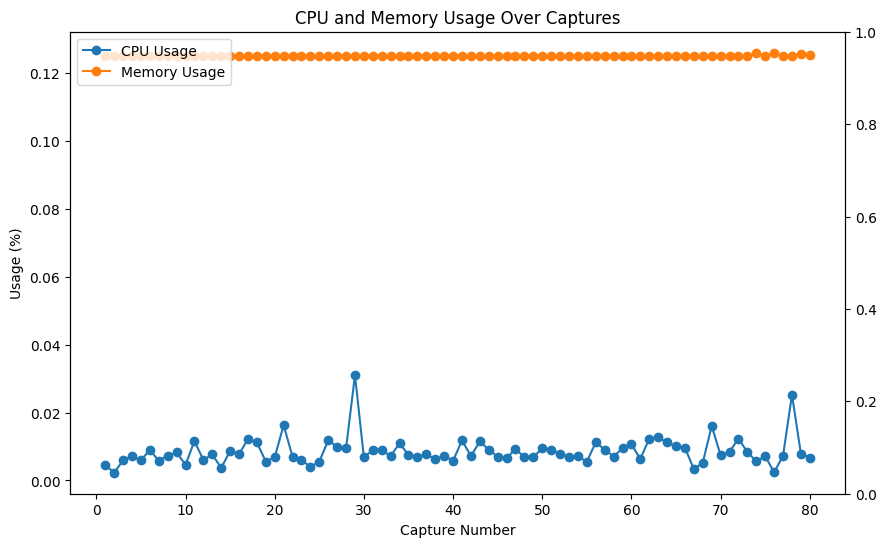

In [20]:
fig, ax1 = plt.subplots(figsize=(10, 6))

ax1.plot(df['capture_number'], df['cpu_usage'], label='CPU Usage', marker='o', color='tab:blue')
ax1.plot(df['capture_number'], df['memory_usage'], label='Memory Usage', marker='o', color='tab:orange')
ax1.set_xlabel('Capture Number')
ax1.set_ylabel('Usage (%)')
ax1.set_title('CPU and Memory Usage Over Captures')
ax1.legend(loc='upper left')

ax2 = ax1.twinx()
ax2.scatter(df['capture_number'], df['num_objects_detected'], color='tab:red', label='Number of Objects Detected')
ax2.set_ylabel('Number of Objects Detected')
ax2.legend(loc='upper right')

plt.show()

## 2. Scatter Plot: CPU and Memory Usage

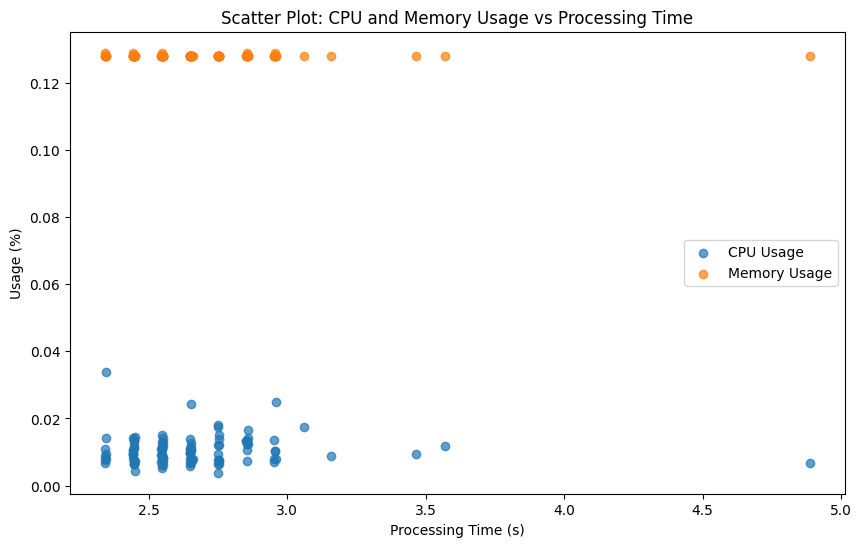

In [10]:
plt.figure(figsize=(10, 6))
plt.scatter(df['processing_time'], df['cpu_usage'], label='CPU Usage', alpha=0.7)

plt.scatter(df['processing_time'], df['memory_usage'], label='Memory Usage', alpha=0.7)
plt.ylabel('Usage (%)')
plt.xlabel('Processing Time (s)')
plt.title('Scatter Plot: CPU and Memory Usage vs Processing Time')
plt.legend()
plt.show()

## 3. Histogram: Distribution of CPU and Memory Usage

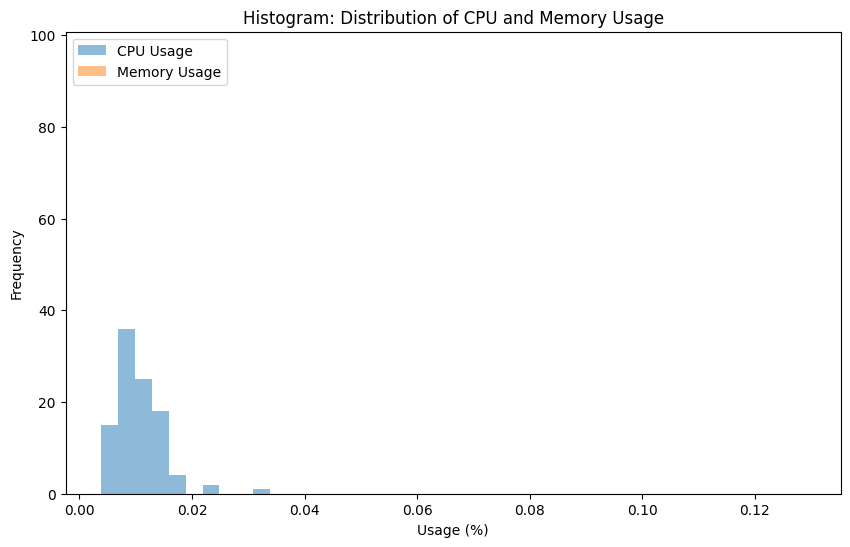

In [11]:
plt.figure(figsize=(10, 6))
plt.hist(df['cpu_usage'], bins=10, alpha=0.5, label='CPU Usage')
plt.hist(df['memory_usage'], bins=10, alpha=0.5, label='Memory Usage')
plt.xlabel('Usage (%)')
plt.ylabel('Frequency')
plt.title('Histogram: Distribution of CPU and Memory Usage')
plt.legend()
plt.show()

## 4. Boxplot: CPU and Memory Usage

In [12]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[['cpu_usage', 'memory_usage']])
plt.title('Boxplot: CPU and Memory Usage')
plt.show()

NameError: name 'sns' is not defined

<Figure size 1000x600 with 0 Axes>

## 5. Stacked Bar Plot: Contribution of Each Stage to Processing Time

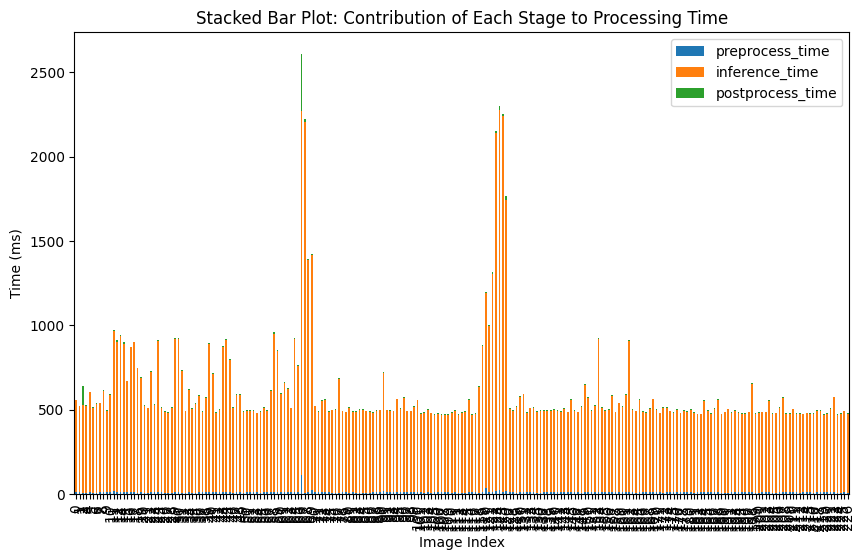

In [12]:
df['total_time'] = df['preprocess_time'] + df['inference_time'] + df['postprocess_time']
df[['preprocess_time', 'inference_time', 'postprocess_time']].plot(kind='bar', stacked=True, figsize=(10, 6))
plt.xlabel('Image Index')
plt.ylabel('Time (ms)')
plt.title('Stacked Bar Plot: Contribution of Each Stage to Processing Time')
plt.show()

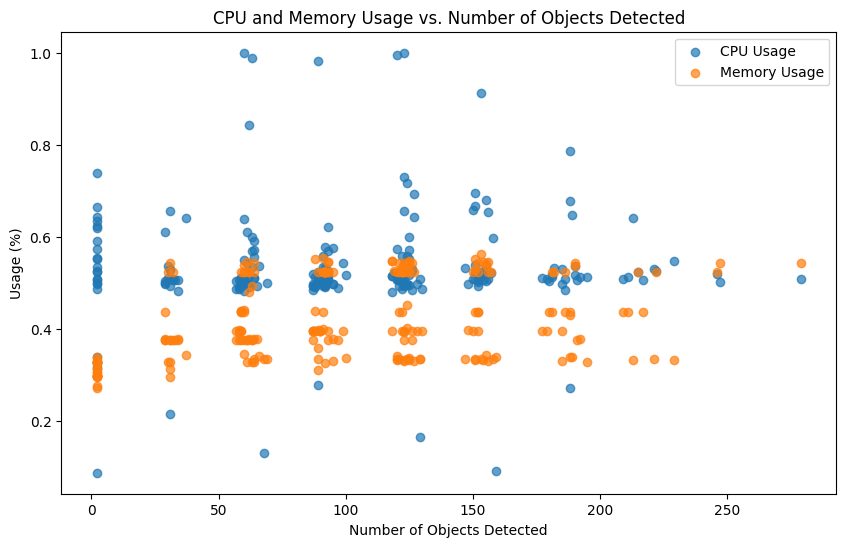

In [14]:
import matplotlib.pyplot as plt

# Calculate the number of objects detected for each row
df['num_objects_detected'] = df['objects_detected'].apply(len)

# Create a scatter plot for CPU and Memory Usage vs. Number of Objects Detected
plt.figure(figsize=(10, 6))
plt.scatter(df['num_objects_detected'], df['cpu_usage'], label='CPU Usage', alpha=0.7)
plt.scatter(df['num_objects_detected'], df['memory_usage'], label='Memory Usage', alpha=0.7)
plt.xlabel('Number of Objects Detected')
plt.ylabel('Usage (%)')
plt.title('CPU and Memory Usage vs. Number of Objects Detected')
plt.legend()
plt.show()

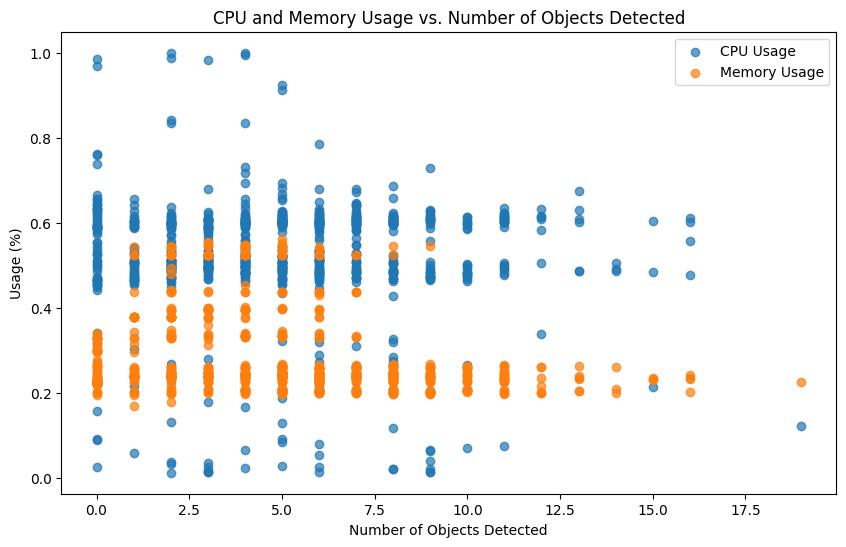

In [13]:
import ast

# Convert the 'objects_detected' column from string to a list (if needed)
df['objects_detected'] = df['objects_detected'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)

# Calculate the number of objects detected for each row
df['num_objects_detected'] = df['objects_detected'].apply(len)

# Create a scatter plot for CPU and Memory Usage vs. Number of Objects Detected
plt.figure(figsize=(10, 6))
plt.scatter(df['num_objects_detected'], df['cpu_usage'], label='CPU Usage', alpha=0.7)
plt.scatter(df['num_objects_detected'], df['memory_usage'], label='Memory Usage', alpha=0.7)
plt.xlabel('Number of Objects Detected')
plt.ylabel('Usage (%)')
plt.title('CPU and Memory Usage vs. Number of Objects Detected')
plt.legend()
plt.show()